<a href="https://colab.research.google.com/github/EricOdhiambo/Customer-Churn-Prediction-in-a-Telecommunication-company/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Customer Churn

This project is aimed at identifying customers that are susceptible to churn in order to enhance retention strategies and boost business growth.

### Import packages and dependencies

In [1]:
import pandas as pd #package to allow manipulation of data in table form, csv, ecxel etc
import numpy as np #for mathematical computations
import matplotlib.pyplot as plt #for plotting visualizations
import seaborn as sns #visualization package
from ast import literal_eval #function in python that allows us to perform computation on a string
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay #sklearn - package for ml; its imported metrics are for evaluating ml models
from sklearn.model_selection import train_test_split #for splitting data into train and test
from sklearn.linear_model import LogisticRegression #model will be used to train our data
from sklearn.preprocessing import StandardScaler, MinMaxScaler #for scaling - column of a range 0 to 1000 can be reduced to range 0 to 10 using the scalers
from sklearn.tree import DecisionTreeClassifier #model to predict customer churn
from tqdm import tqdm #package that allows u visualize the progress of an operation in  Python - 10 loops running can be visualized to tell how long they wull take to complete


In [2]:
import warnings                         # updates may have been made e.g by numpy devs. It may take time for pandas devs
warnings.filterwarnings('ignore')       # to make updates that will match numpy updates for compatibilitys when both are in use.
                                        # Warnings (not errors) may show to explain changes that were made. We ignore them

## Data Collection

Load the dataset into Python with Pandas

In [3]:
# mount drive - data location
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# File path of the dataset
file_path = '/content/drive/MyDrive/datasets/CustomerChurn/customers_dataset.xlsx'

try:
  #try loading the dataset as a dataframe called customer_df
  customer_df = pd.read_excel(file_path)
  #if successful, print 'data loaded successfuly'
  print(True)
  print('Data has been loaded successfully')
except Exception as e:
  #if there is an exception, print False and an error message
  print(False)
  print("Data has not been loaded")

True
Data has been loaded successfully


### Data Exploration

In this phase, we'll be looking at:
- Understanding the data structure, statistics, and quality of the dataset
- Visualizing the data to gain insights
- Checking for missing values and handling them

An overview of the dataset

In [5]:
#print a sample of 8 rows of the dataset loaded
customer_df.head(8)

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,"[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2019-04-10'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05 22:42:22
5,1006,Samuel Cordova,65,Female,West Nichole,zachary56@example.net,001-333-812-1313x1564,"723 Ellis Cliffs\nWilliamchester, AK 78120",Segment A,"[{'Product': 'Watering Can Accesssories', 'Fre...",...,"[{'Type': 'Email', 'Date': '2020-12-21'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 34...","{'PageViews': 40, 'TimeSpent(minutes)': 17}","[{'Action': 'Click', 'Page': 'author', 'Timest...","{'Logins': 23, 'Frequency': 'Daily'}","{'Rating': 2, 'Comment': 'Next admit yes adult...","[{'Email_Sent': '2022-10-21', 'Email_Opened': ...",2,1,2020-03-25 22:44:33
6,1007,Wesley Turner,52,Female,Emilyland,brookekrause@example.net,623.025.4444x899,"93854 Patricia Inlet Apt. 323\nJohnburgh, MS 6...",Segment B,"[{'Product': 'Paint Shakers', 'Frequency': 3, ...",...,"[{'Type': 'Chat', 'Date': '2020-05-20'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 24...","{'PageViews': 23, 'TimeSpent(minutes)': 25}","[{'Action': 'Cli

Notes for scientists:

👉 Check missing values (fill in if any)- we dont want to perform computations later on and get errors since we didnt check for missing values. E.g we cant add two columns that are supposed to be integers if there are missing values in a column or both

👉 Check for duplicates (remove dups if any) - it becomes an issue if for example we are counting the total number of customers then re-count a row or two because it was duplicated. The count will be false, missleading the analysis and prediction. * ***Hint*** To count the total number of customers, count the length/number of rows

👉  Statistical analysis - We need to understand our dataset, the columns (which will form the metrics to be used) E.g What's the minimum or maximum age of the customer ?


Checking for missing values from the dataset

In [6]:
missing_values = customer_df.isnull().sum() #will see sum of missing values in each columns

missing_values #print out missing values

,0
CustomerID,0
Name,0
Age,0
Gender,0
Location,0
Email,0
Phone,0
Address,0
Segment,0
PurchaseHistory,0


Check for duplicates

In [7]:
# check all rows. If there is any duplicates return True, otherwise return False
customer_df.duplicated().any()

False

- Each row is unique. NO duplicates

#### **Statistical overview of the columns in the dataset**

In [8]:
#we'll use th edescribe function
data_overview = customer_df.describe()

data_overview

,CustomerID,Age,NPS,ChurnLabel
count,12483.00000,12483.000000,12483.000000,12483.000000
mean,7242.00000,43.930065,2.973884,0.505808
std,3603.67604,15.341521,2.644623,0.499986
min,1001.00000,18.000000,0.000000,0.000000
25%,4121.50000,31.000000,1.000000,0.000000
50%,7242.00000,44.000000,2.000000,1.000000
75%,10362.50000,57.000000,4.000000,1.000000
max,13483.00000,70.000000,9.000000,1.000000




*   The average age of all the customers in the dataset is 43.
*   The average net performance score (NPS) is 2.97
*   The average of ChurnLable, our target variable, is 0.5. Remember🗯 - The label has entries of 1 and 0 - **1** to mean the **customer left**, **0** to mean the customer **has not left**




See how the target variable **ChurnLabel**, and other variables are distributed

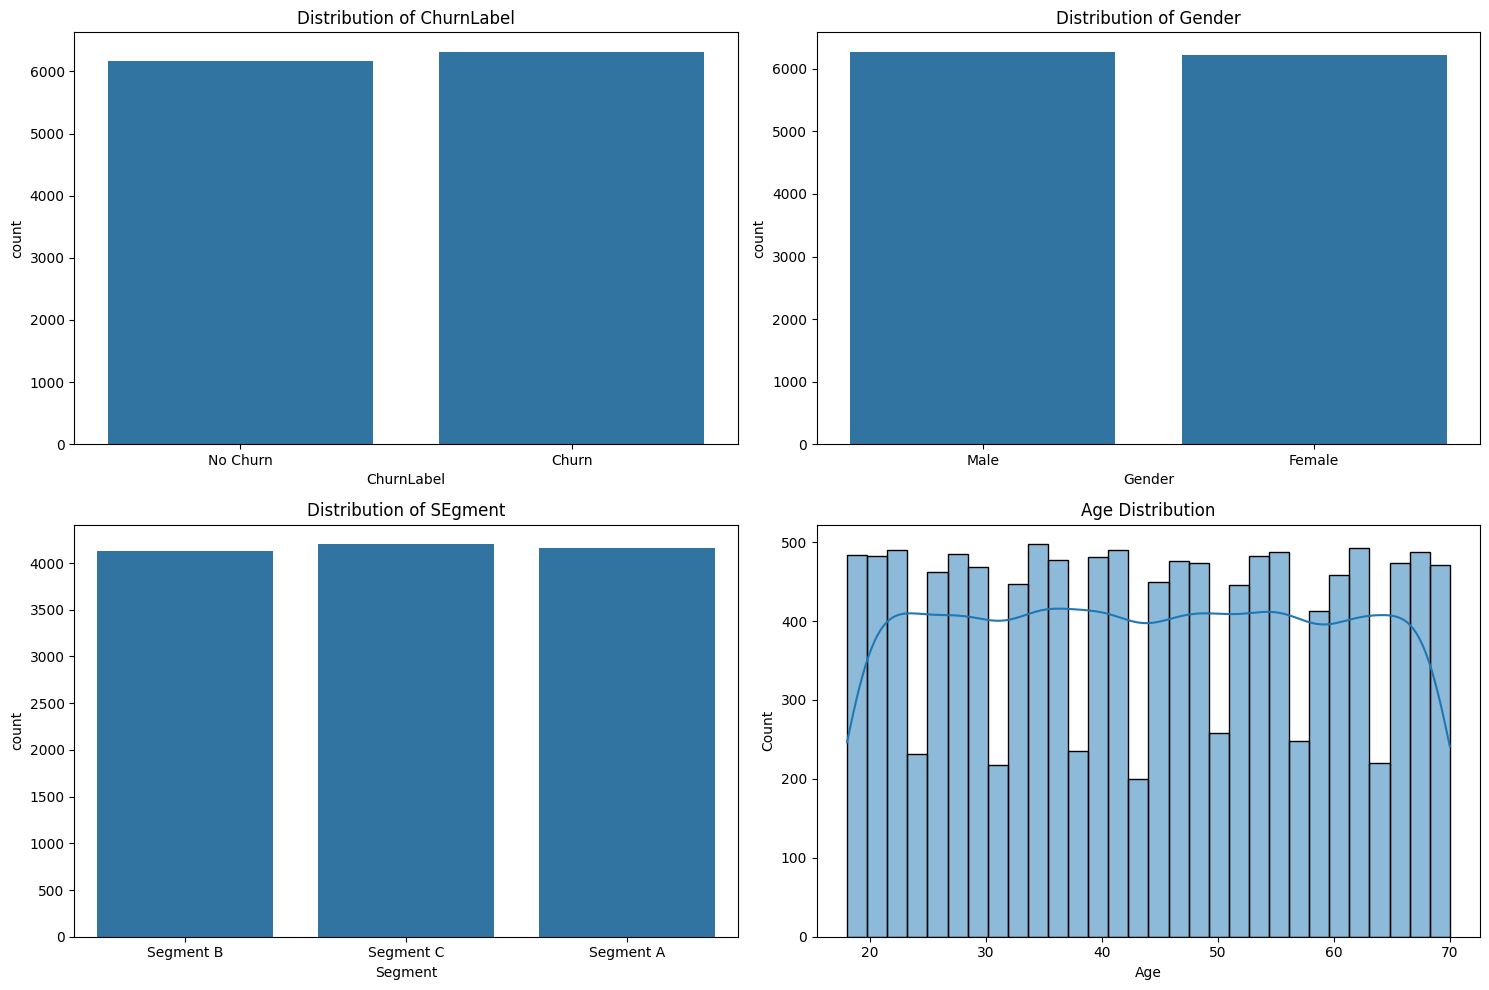

In [9]:
# setup the figure and the axes
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# plot the distribution
sns.countplot(x='ChurnLabel', data=customer_df, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of ChurnLabel')
ax[0, 0].set_xticklabels(['No Churn', 'Churn'])


# plot thge distribution of the Gender
sns.countplot(x='Gender', data=customer_df, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Gender')


# Plot distribution of Segment
sns.countplot(x='Segment', data=customer_df, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of SEgment')


# Age distribution
sns.histplot(customer_df['Age'], bins=30, ax=ax[1, 1], kde=True)
ax[1, 1].set_title('Age Distribution')


plt.tight_layout()
plt.show()


####**Correlation Analysis**: Which columns in the dataset correlates with the 'ChurnLabel' column

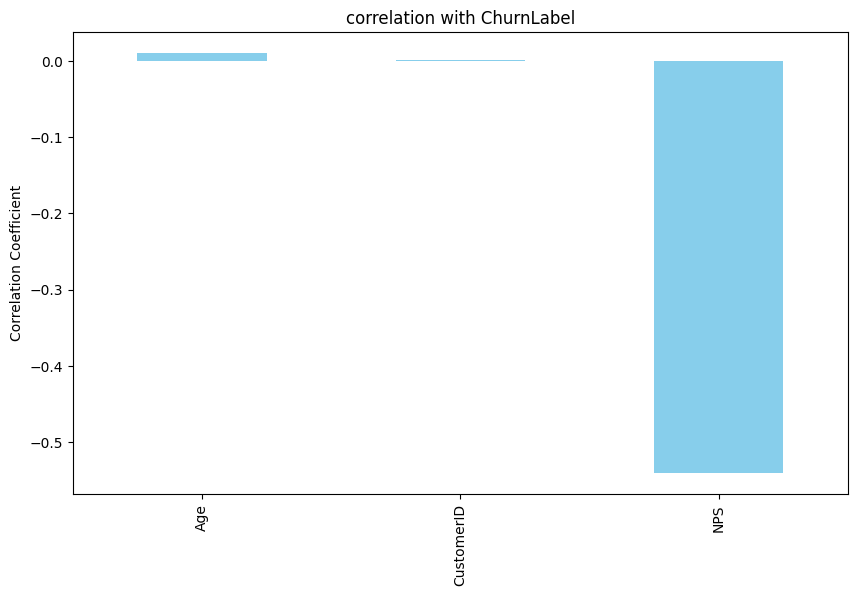

,ChurnLabel
ChurnLabel,1.000000
Age,0.010273
CustomerID,0.001530
NPS,-0.540703


In [10]:
# calculating correlation value with Churnlable
correlation = customer_df.select_dtypes(include=np.number).corr()['ChurnLabel'].sort_values(ascending=False)

# plot the correlation
plt.figure(figsize=(10, 6))
correlation.drop('ChurnLabel').plot(kind='bar', color='skyblue')
plt.title('correlation with ChurnLabel')
plt.ylabel('Correlation Coefficient')
plt.show()

correlation

We will explore the nested columns and see how the columns are nested

In [11]:
 #list out all the nested columns
nested_columns = [
      'PurchaseHistory',
      'SubscriptionDetails',
      'ServiceInteractions',
      'PaymentHistory',
      'WebsiteUsage',
      'ClickstreamData',
      'EngagementMetrics',
      'Feedback',
      'MarketingCommunication'
  ]

  # Print out the first value in each of the columns
w1, w2 = 25, 1000
for col in nested_columns:
    row = [col, customer_df[col][0]]
    print('\n| {:<{w1}} | {:<{w2}} |'.format(*row, w1=w1, w2=w2))



| PurchaseHistory           | [{'Product': 'Frozen Cocktail Mixes', 'Frequency': 8, 'Value': 884.43}, {'Product': 'Printer, Copier & Fax Machine Accessories', 'Frequency': 7, 'Value': 397.14}, {'Product': 'Hockey Stick Care', 'Frequency': 10, 'Value': 498.92}, {'Product': 'Guacamole', 'Frequency': 2, 'Value': 718.43}, {'Product': 'Mortisers', 'Frequency': 2, 'Value': 614.08}, {'Product': 'Rulers', 'Frequency': 6, 'Value': 221.68}, {'Product': 'Invitations', 'Frequency': 3, 'Value': 660.04}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

Temperal Anlysis

We will look at how the Churn rate changes over time and if there are any recurring patterns.

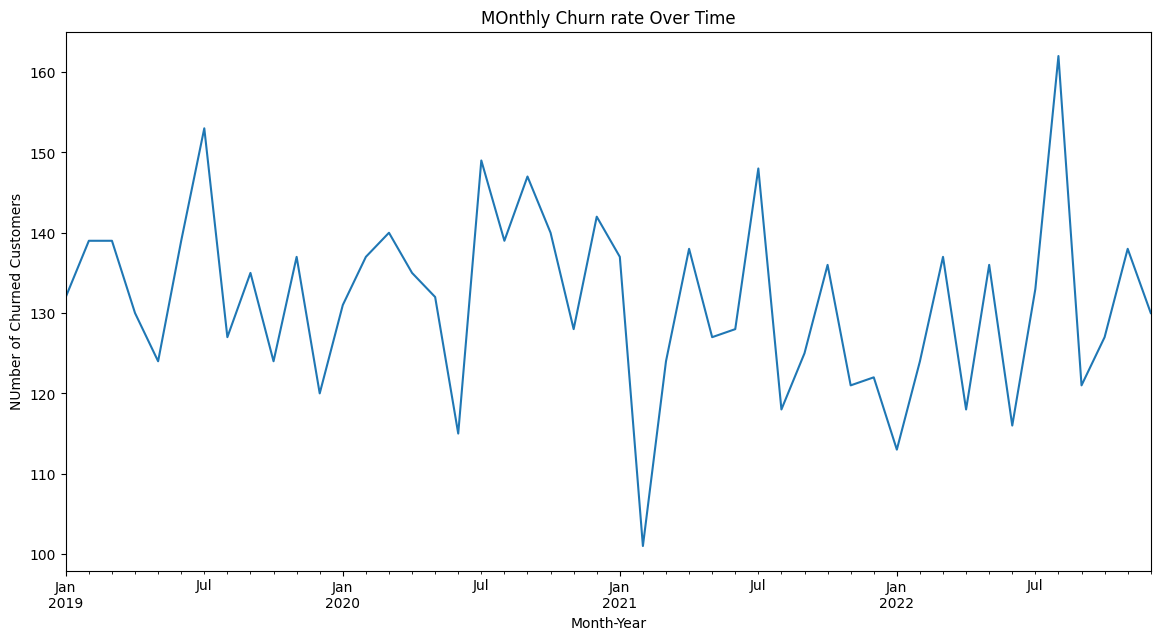

In [12]:
# Convert the Timestamp to datetime format so that it can be grouped
customer_df['Timestamp'] = pd.to_datetime(customer_df['Timestamp'])


#Etract the month-year from the Timestamp
customer_df['MonthYear'] = customer_df['Timestamp'].dt.to_period('M')


# Group the MOnthYear and calculate the churn rates
monthly_churn_rate = customer_df.groupby('MonthYear')['ChurnLabel'].sum()


# plot the churn rate over time
plt.figure(figsize=(14, 7))
monthly_churn_rate.plot()
plt.title('MOnthly Churn rate Over Time')
plt.ylabel('NUmber of Churned Customers')
plt.xlabel('Month-Year')
plt.show()

WE also look to see if there are any patterns between the customer feedback **'Rating'** and the **'ChurnLabel'**

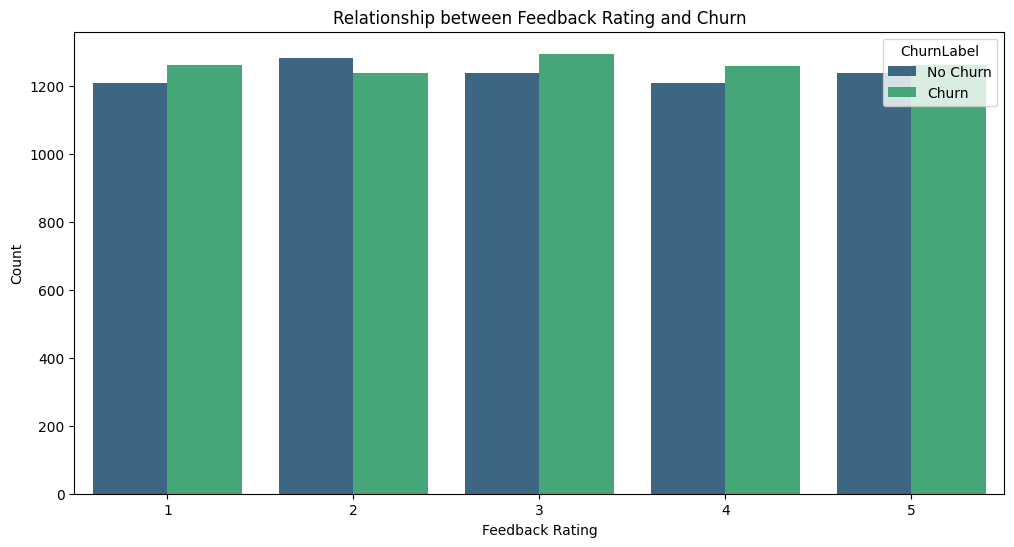

In [13]:
# extract the rating ratings from the feedback columns and creating a new column for it

customer_df['FeedbackRating'] = customer_df['Feedback'].apply(lambda x: eval(x)['Rating'])


#plot the relationship between feedback rating and chur
plt.figure(figsize=(12, 6))
sns.countplot(x='FeedbackRating', data=customer_df, hue='ChurnLabel', palette='viridis')
plt.title('Relationship between Feedback Rating and Churn')
plt.xlabel('Feedback Rating')
plt.ylabel('Count')
plt.legend(title='ChurnLabel', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

From the visual, there doesn't seem to be any indication thet the **Feedback rating** affects **ChurnLabel**